In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
ll = likelihood_analyser.LikelihoodAnalyser()
bandwidth = 2
decimate = 10
drive_freq = 71
fsamp = 5000
def get_scale(i,phase="sin"):
    calibrationFile = step_cal_files[i]       
    calibFreqs = np.fft.rfftfreq(len(calibrationFile.electrode_data[0]), d=1./5000)
    fft_angles = np.angle(np.fft.rfft(calibrationFile.electrode_data[0]))
    if(phase=="cos"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq])%(2*np.pi)
    elif(phase=="sin"):
        phaseResponse = (fft_angles[calibFreqs==drive_freq]+np.pi/2)%(2*np.pi)

    print(phaseResponse,np.std(calibrationFile.electrode_data[0])*np.sqrt(2))

    fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': phaseResponse, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}

    frequency = fit_kwargs['f']

    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/fsamp, 2.*(drive_freq+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, calibrationFile.x2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [3]:
step_cal_dir = r'/data/new_trap/20210622/bead1/Discharge/FineDischarge/'
step_cal_files = load_dir(step_cal_dir, start_file=300)

100%|██████████| 280/280 [00:07<00:00, 39.12it/s]

580  files in folder
280  files loaded


In [4]:
dischargeAmps = []
for i in range(len(step_cal_files)):
    print(i,'/',len(step_cal_files))
    dischargeAmps.append(get_scale(i))

0 / 280
[0.08190331] 9.996283880412916
1 / 280
[0.08190909] 9.996281304225382
2 / 280
[0.08189878] 9.996281537733502
3 / 280
[0.08188683] 9.996288002004473
4 / 280
[0.08188301] 9.996283855239406
5 / 280
[0.0818812] 9.996280896041402
6 / 280
[0.08188132] 9.996280781109695
7 / 280
[0.08187602] 9.996281466488083
8 / 280
[0.08187166] 9.996283836062767
9 / 280
[0.08186824] 9.99628049649982
10 / 280
[0.08185259] 9.99628122742368
11 / 280
[0.08184229] 9.996278292760515
12 / 280
[0.08184375] 9.9962872679154
13 / 280
[0.08185011] 9.996282311106809
14 / 280
[0.08185688] 9.996282232848417
15 / 280
[0.08187448] 9.99628608262862
16 / 280
[0.0818733] 9.996285608676523
17 / 280
[0.08187297] 9.996284865507036
18 / 280
[0.08186803] 9.996282915362116
19 / 280
[0.08185791] 9.996282562713075
20 / 280
[0.08185112] 9.996280282430336
21 / 280
[0.08186028] 9.996284879184568
22 / 280
[0.08187175] 9.99628085579499
23 / 280
[0.08186014] 9.996283020975962
24 / 280
[0.08186719] 9.996287090219038
25 / 280
[0.081872

214 / 280
[0.08190371] 9.996283979268693
215 / 280
[0.08190964] 9.996278217408733
216 / 280
[0.08190812] 9.996281835959412
217 / 280
[0.08189192] 9.996278896802057
218 / 280
[0.08189368] 9.996275926505898
219 / 280
[0.08190671] 9.996279128442351
220 / 280
[0.08179691] 9.99627468897426
221 / 280
[0.08182042] 9.99627516703645
222 / 280
[0.08180523] 9.99627521228304
223 / 280
[0.08181146] 9.99627824130788
224 / 280
[0.08183009] 9.996278267050043
225 / 280
[0.08180829] 9.996275926682001
226 / 280
[0.08182235] 9.996279022607434
227 / 280
[0.08182145] 9.996281920292775
228 / 280
[0.08182219] 9.99628283021442
229 / 280
[0.08184658] 9.996279959458805
230 / 280
[0.08186107] 9.996278940572699
231 / 280
[0.08185479] 9.996280217483479
232 / 280
[0.0818335] 9.996273964556677
233 / 280
[0.08184075] 9.99627808392072
234 / 280
[0.08184671] 9.996280048447549
235 / 280
[0.0818646] 9.996273892287004
236 / 280
[0.08186131] 9.99627225841259
237 / 280
[0.08186464] 9.996274749993654
238 / 280
[0.08185296] 9.

In [5]:
scaleX = np.abs(np.mean(dischargeAmps[180:200]))
scaleY = scaleX*-1.0502 # from discharge values in x and y
print("Scale is ", scaleY)
dischargeVoltage = np.std(step_cal_files[-1].electrode_data[0])*np.sqrt(2)
print("voltage: ", dischargeVoltage)

Scale is  -3.542952205750171e-05
voltage:  9.996282495738035


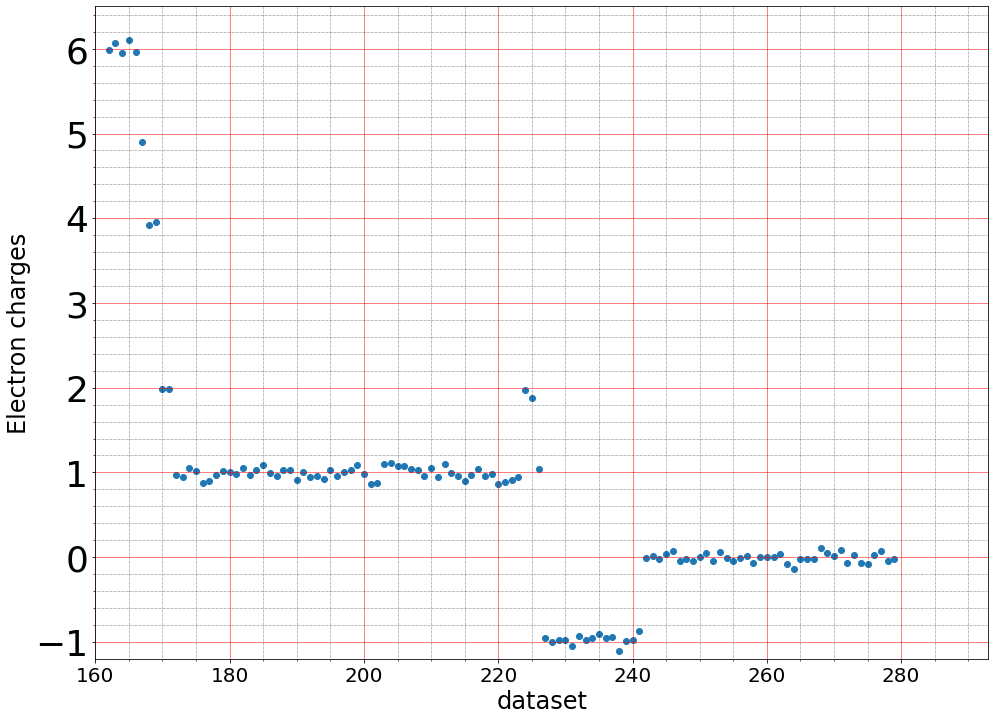

In [6]:
# amps = np.array(amps)
dischargeAmpArr = np.array(dischargeAmps)
_,ax = plt.subplots(figsize=(16,12))
# scale = 326.26

# Perrinf
ax.scatter(range(len(dischargeAmpArr)), dischargeAmpArr/scaleX, label='fit phase')
# ax.scatter(range(len(amps3)), amps3/scale, label='fit fixed-phases')

ax.set(xlabel='dataset', ylabel='Electron charges', ylim=(-1.2,6.5), xlim=(160,None))
ax.grid(axis='y')
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# ax.legend()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [7]:
def get_response_at_first(i,folder,drive_freq=71):
    phaseCalib1 = -0.0563 # where from?
    # phase_calib = -0.0442
    drive_freq1=drive_freq
    fname = folder + 'Discharge_'+str(i)+'.h5'
    if(i==1):print(fname)
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'f': drive_freq1, 'phi': phaseCalib1, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}
    
    b, a = signal.butter(3, [2.*(drive_freq1-bandwidth/2.)/fsamp, 2.*(drive_freq1+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, neutralityFile.y2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [8]:
def get_response_at_second(i,folder,drive_freq=71):
    phaseCalib2 = -0.0563+np.pi/2 # where from?
    # phase_calib = -0.0442
    drive_freq2=drive_freq*2
    fname = folder + 'Discharge_'+str(i)+'.h5'
    if(i==1):print(fname)
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    fit_kwargs = {'A': 0, 'f': drive_freq2, 'phi': phaseCalib2, 
                  'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [-2 * np.pi, 2 * np.pi], 
                  'limit_A': [-1, 1], 
                  'print_level': 0, 'fix_f': True, 'fix_phi': True}
    
    b, a = signal.butter(3, [2.*(drive_freq2-bandwidth/2.)/fsamp, 2.*(drive_freq2+bandwidth/2.)/fsamp ], btype = 'bandpass')
    xx2 = signal.filtfilt(b, a, neutralityFile.y2)[::decimate]
    
    m1_tmp = ll.find_mle_sin(xx2, fsamp=5000/decimate, noise_rms=1, plot=False, suppress_print=True, **fit_kwargs)
    
    return m1_tmp.values[0]

In [9]:
def get_voltage(folder):    
    i=0
    trekConvFactor = 200
    fname = folder + 'Discharge_'+str(i)+'.h5'
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    voltage0= np.std(neutralityFile.electrode_data[0])*np.sqrt(2)*trekConvFactor
    voltage1= np.std(neutralityFile.electrode_data[1])*np.sqrt(2)*trekConvFactor
    bias = np.mean(neutralityFile.electrode_data[0])*200
    print("voltages, bias: ", voltage0, voltage1, bias)
    appliedVoltage=voltage0
    return appliedVoltage

In [178]:
def compare_millicharge_full_analysis_perFile(folders,printValues=True,fileNo=2000,gap=1):
    df = pd.DataFrame()
    i=0
    for folder in folders:   
        i+=1
        appliedVoltage=get_voltage(folder)
        
        F = np.array(Parallel(n_jobs=32)(delayed(get_response_at_first)(j,folder) for j in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=32)(delayed(get_response_at_second)(j,folder) for j in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0[::2*gap]
        F2=data0[gap::2*gap]

        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1[::2*gap]
        G2=data1[gap::2*gap]        
        
        df["F1_%d" %i] = F1
        df["F2_%d" %i] = F2
        df["G1_%d" %i] = G1
        df["G2_%d" %i] = G2
        df["A_%d"  %i] =  np.add(np.multiply(F2,0.85),F1)
        df["B_%d"  %i] =  np.subtract(G1,np.multiply(-G2,0.85**2))

        
    return df

In [179]:
def get_sideband_analysis_perFile(folders,printValues=True,fileNo=2000,gap=1):
    df = pd.DataFrame()
    i=0
    for folder in folders:   
        i+=1
        appliedVoltage=get_voltage(folder)
        
        F = np.array(Parallel(n_jobs=32)(delayed(get_response_at_first)(j,folder,drive_freq=67) for j in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=32)(delayed(get_response_at_second)(j,folder,drive_freq=67) for j in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0[::2*gap]
        F2=data0[gap::2*gap]

        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1[::2*gap]
        G2=data1[gap::2*gap]        
        
        df["F1_%d" %i] = F1
        df["F2_%d" %i] = F2
        df["G1_%d" %i] = G1
        df["G2_%d" %i] = G2
        df["A_%d"  %i] =  np.add(np.multiply(F2,0.85),F1)
        df["B_%d"  %i] =  np.subtract(G1,np.multiply(-G2,0.85**2))

        
    return df

 93%|█████████▎| 16800/18000 [01:10<00:05, 221.07it/s]

In [180]:
# no gap measurements
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_20V_71Hz_height_0_spin_46kHz_files_5000/',
           r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/40V_norelax/",
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_150V_71Hz_height_0_spin_46kHz_files_1000/',
           r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/',]
           
df = compare_millicharge_full_analysis_perFile(folders,fileNo=1998)


  0%|          | 0/1998 [00:00<?, ?it/s]

voltages, bias:  20.017053026058893 0.353947973963061 0.37772059261273727



  0%|          | 0/1998 [00:00<?, ?it/s]

voltages, bias:  40.02040319571283 0.09729556162992023 0.3690680976081138



  0%|          | 0/1998 [00:00<?, ?it/s]

voltages, bias:  150.03945536820794 0.3540403000511779 0.3897744082685093



  0%|          | 0/1998 [00:00<?, ?it/s]

voltages, bias:  200.04697042209622 0.354010050178249 0.3771732010445046



100%|██████████| 1998/1998 [00:02<00:00, 685.20it/s]

In [181]:
meanDF = np.mean(df)
stdDF = np.std(df)/np.sqrt(len(df))

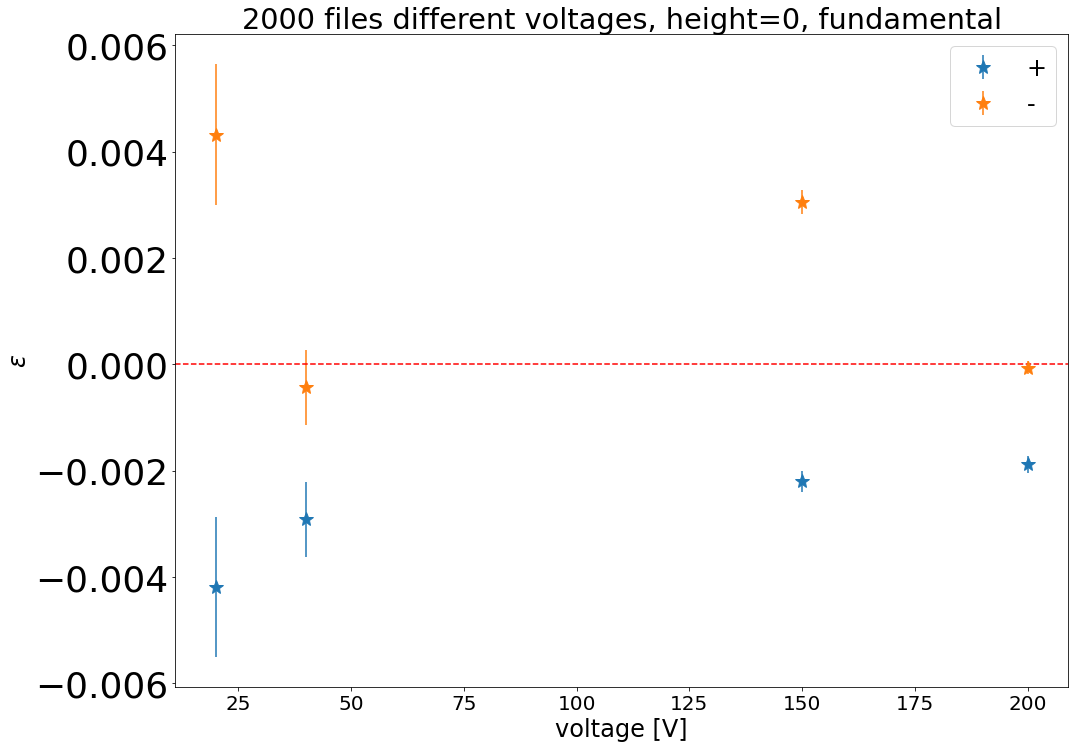

In [182]:
x=[20,40,150,200]
plt.errorbar(x,meanDF[::6],yerr=stdDF[::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(x,meanDF[1::6],yerr=stdDF[1::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("2000 files different voltages, height=0, fundamental")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("voltage [V]")

plt.legend()

plt.show()

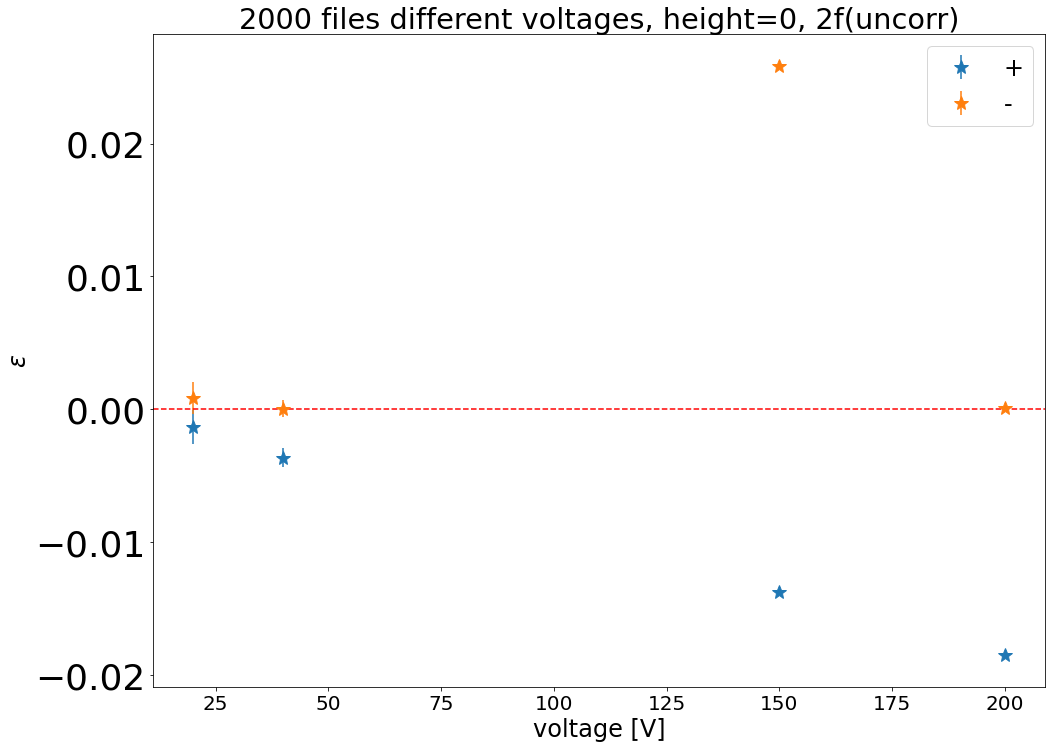

In [183]:
x=[20,40,150,200]
plt.errorbar(x,meanDF[2::6],yerr=stdDF[2::6],linestyle="",marker="*",markersize=15,label="+")
plt.errorbar(x,meanDF[3::6],yerr=stdDF[3::6],linestyle="",marker="*",markersize=15,label="-")
plt.title("2000 files different voltages, height=0, 2f(uncorr)")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("voltage [V]")

plt.legend()

plt.show()

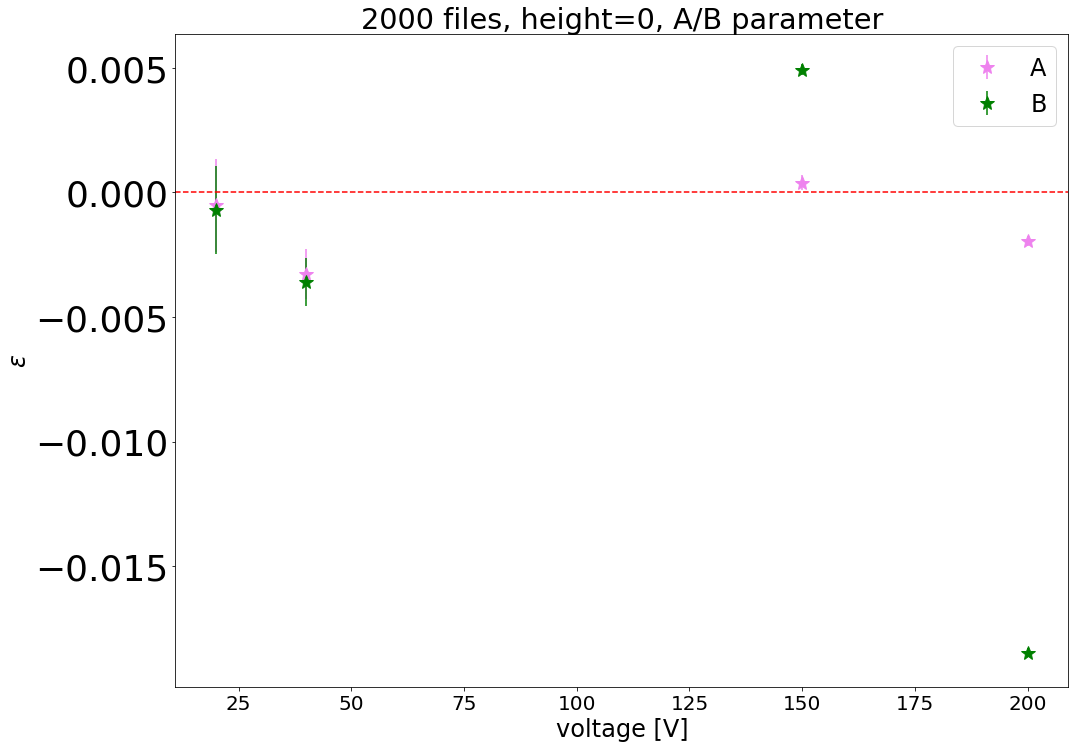

In [184]:
x=[20,40,150,200]

yerr=  [np.sqrt(stdDF[i]**2+stdDF[i+1]**2) for i in np.arange(0,len(stdDF),6)]
yerr2=  [np.sqrt(stdDF[i]**2+stdDF[i+1]**2) for i in np.arange(2,len(stdDF),6)]

plt.errorbar(x,meanDF[4::6],yerr=yerr,linestyle="",marker="*",markersize=15,label="A",color="violet")
plt.errorbar(x,meanDF[5::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="B",color="green")

plt.title("2000 files, height=0, A/B parameter")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("voltage [V]")

plt.legend()
plt.show()

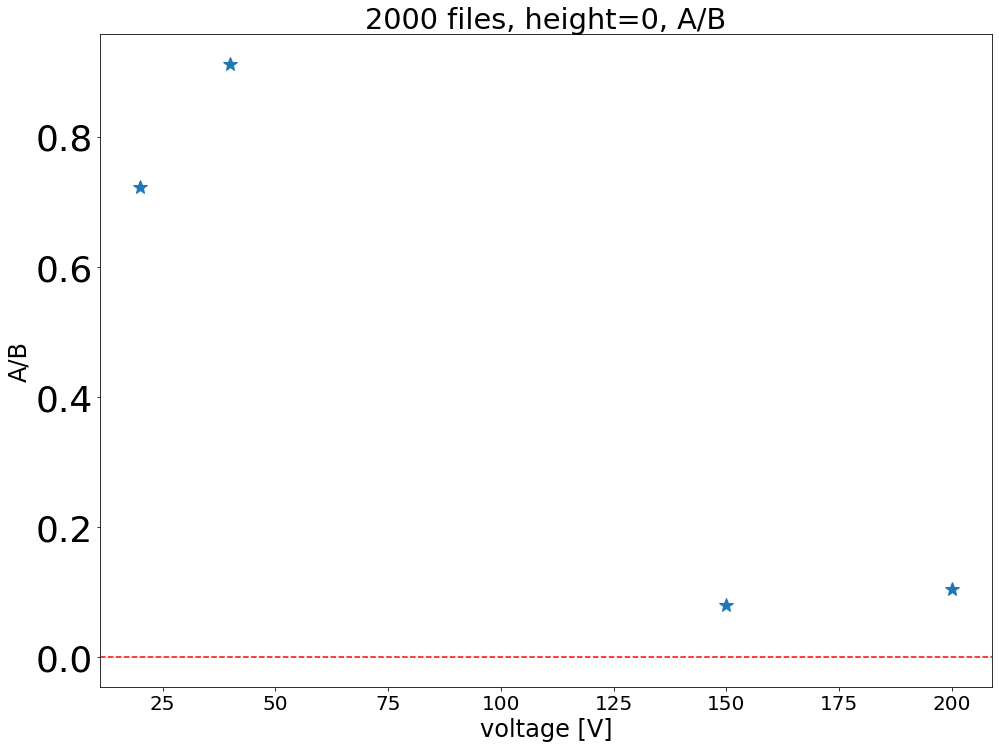

In [185]:
x=[20,40,150,200]
AoverB = [meanDF[i+4]/meanDF[i+5] for i in range(0,len(meanDF),6)]

plt.plot(x,AoverB,linestyle="",marker="*",markersize=15,label="-")
plt.title("2000 files, height=0, A/B")
plt.ylabel(r"A/B")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("voltage [V]")

plt.show()

In [186]:
#gap measurements
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Y_alternate_200V_71Hz_height_0_spin_46kHz_files_5000/']
df0 = compare_millicharge_full_analysis_perFile(folders,fileNo=1998)
df0_side = get_sideband_analysis_perFile(folders,fileNo=1998)



  0%|          | 0/1998 [00:00<?, ?it/s]

voltages, bias:  200.04697042209622 0.354010050178249 0.3771732010445046



  6%|▋         | 128/1998 [00:00<00:02, 865.51it/s]

voltages, bias:  200.04697042209622 0.354010050178249 0.3771732010445046



100%|██████████| 1998/1998 [00:03<00:00, 549.92it/s]

In [187]:
#gap measurements
folders = [r'/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V/']
df1 = compare_millicharge_full_analysis_perFile(folders,fileNo=750,gap=5)
df1_side = get_sideband_analysis_perFile(folders,fileNo=750,gap=5)



  0%|          | 0/750 [00:00<?, ?it/s]

voltages, bias:  199.9150269052005 0.005968747734094512 0.20120087234732598



  0%|          | 0/750 [00:00<?, ?it/s]

voltages, bias:  199.9150269052005 0.005968747734094512 0.20120087234732598



100%|██████████| 750/750 [00:02<00:00, 298.82it/s]

In [188]:
#gap measurements
folders = [r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_2/",]
df2 = compare_millicharge_full_analysis_perFile(folders,fileNo=18000,gap=2)
df2_side = get_sideband_analysis_perFile(folders,fileNo=18000,gap=2)



  0%|          | 0/18000 [00:00<?, ?it/s]

voltages, bias:  199.91493035973804 0.006001911993640894 0.20100535702823613



 28%|██▊       | 4992/18000 [00:59<02:42, 80.21it/s]


 54%|█████▎    | 9632/18000 [01:55<01:37, 86.17it/s]


 79%|███████▉  | 14208/18000 [02:53<00:48, 77.65it/s]


  6%|▌         | 1024/18000 [00:11<03:42, 76.33it/s]


 32%|███▏      | 5696/18000 [01:12<02:05, 98.24it/s]


 57%|█████▋    | 10336/18000 [02:15<01:29, 85.89it/s]


 86%|████████▋ | 15552/18000 [03:20<00:32, 75.97it/s]


  0%|          | 0/18000 [00:00<?, ?it/s]

voltages, bias:  199.91493035973804 0.006001911993640894 0.20100535702823613



 31%|███       | 5504/18000 [01:05<02:52, 72.55it/s]


 56%|█████▋    | 10144/18000 [02:07<02:02, 64.16it/s]


 82%|████████▏ | 14720/18000 [03:08<00:38, 85.11it/s]


  8%|▊         | 1472/18000 [00:20<03:42, 74.27it/s]


 37%|███▋      | 6656/18000 [01:24<01:46, 106.59it/s]


 72%|███████▏  | 12992/18000 [02:31<00:46, 108.76it/s]


100%|██████████| 18000/18000 [03:16<00:00, 91.55it/s] 

In [189]:
folders = [r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_3/",]
df3 = compare_millicharge_full_analysis_perFile(folders,fileNo=4998)
df3_side = get_sideband_analysis_perFile(folders,fileNo=4998)



  0%|          | 0/4998 [00:00<?, ?it/s]

voltages, bias:  200.0477466616795 0.09791119614142484 0.36155923850777216



  3%|▎         | 128/4998 [00:00<00:04, 996.82it/s]

voltages, bias:  200.0477466616795 0.09791119614142484 0.36155923850777216



100%|██████████| 4998/4998 [00:06<00:00, 742.10it/s]

In [190]:
meanDF0 = np.mean(df0)
stdDF0 = np.std(df0)/np.sqrt(len(df0))
meanDF1 = np.mean(df1)
stdDF1 = np.std(df1)/np.sqrt(len(df1))
meanDF2 = np.mean(df2)
stdDF2 = np.std(df2)/np.sqrt(len(df2))
meanDF3 = np.mean(df3)
stdDF3 = np.std(df3)/np.sqrt(len(df3))

In [191]:
df2

,F1_1,F2_1,G1_1,G2_1,A_1,B_1
0,-0.004627,0.004058,-0.000754,0.003179,-0.001178,0.001543
1,0.002031,0.000606,0.000948,-0.001028,0.002547,0.000206
2,-0.000024,-0.003288,0.006016,0.004053,-0.002819,0.008944
3,-0.006695,0.001452,-0.002582,0.001954,-0.005461,-0.001171
4,0.001857,0.001149,-0.002806,0.005669,0.002834,0.001290
...,...,...,...,...,...,...
4495,0.005382,-0.003225,-0.005682,-0.001457,0.002641,-0.006735
4496,-0.005432,-0.003208,-0.008860,-0.005190,-0.008158,-0.012610
4497,-0.002989,-0.006841,-0.011547,0.003140,-0.008804,-0.009279
4498,0.004508,-0.000770,0.000699,-0.002300,0.003854,-0.000962


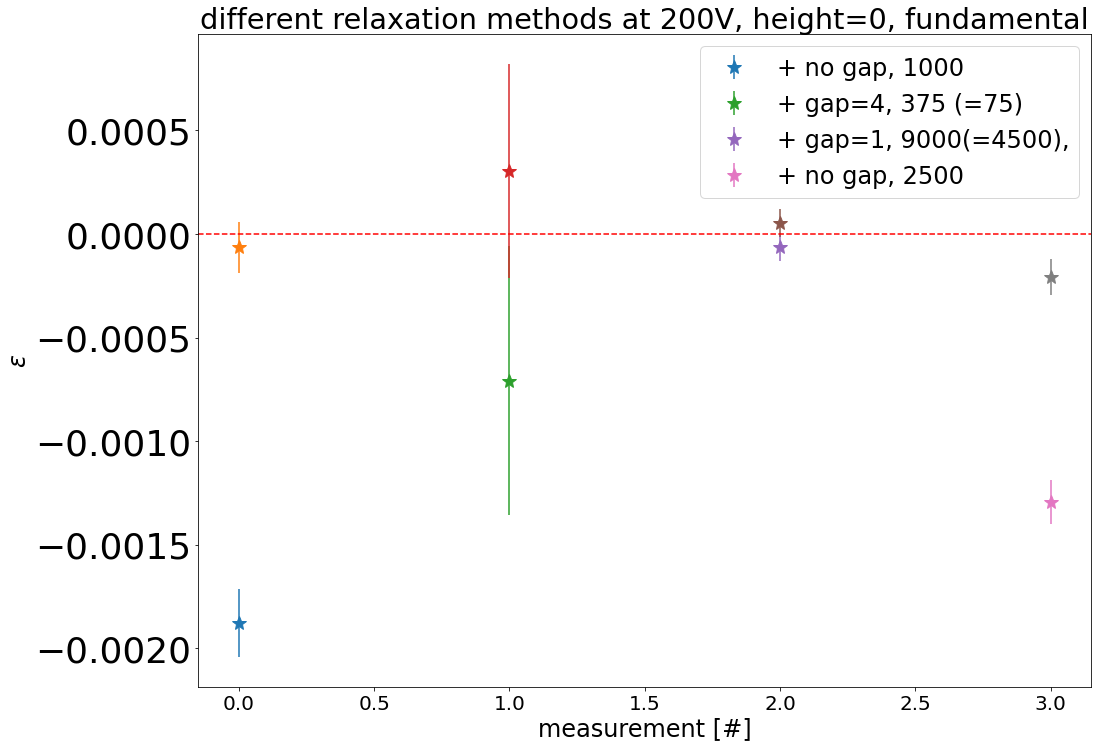

In [192]:
x=[0]
plt.errorbar(x,meanDF0[::6],yerr=stdDF0[::6],linestyle="",marker="*",markersize=15,label="+ no gap, 1000")
plt.errorbar(x,meanDF0[1::6],yerr=stdDF0[1::6],linestyle="",marker="*",markersize=15,)
x=[1]
plt.errorbar(x,meanDF1[::6],yerr=stdDF1[::6],linestyle="",marker="*",markersize=15,label="+ gap=4, 375 (=75)")
plt.errorbar(x,meanDF1[1::6],yerr=stdDF1[1::6],linestyle="",marker="*",markersize=15,)
x=[2]
plt.errorbar(x,meanDF2[::6],yerr=stdDF2[::6],linestyle="",marker="*",markersize=15,label="+ gap=1, 9000(=4500),")
plt.errorbar(x,meanDF2[1::6],yerr=stdDF2[1::6],linestyle="",marker="*",markersize=15)
x=[3]
plt.errorbar(x,meanDF3[::6],yerr=stdDF3[::6],linestyle="",marker="*",markersize=15,label="+ no gap, 2500")
plt.errorbar(x,meanDF3[1::6],yerr=stdDF3[1::6],linestyle="",marker="*",markersize=15)



plt.title("different relaxation methods at 200V, height=0, fundamental")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement [#]")

plt.legend()

plt.show()

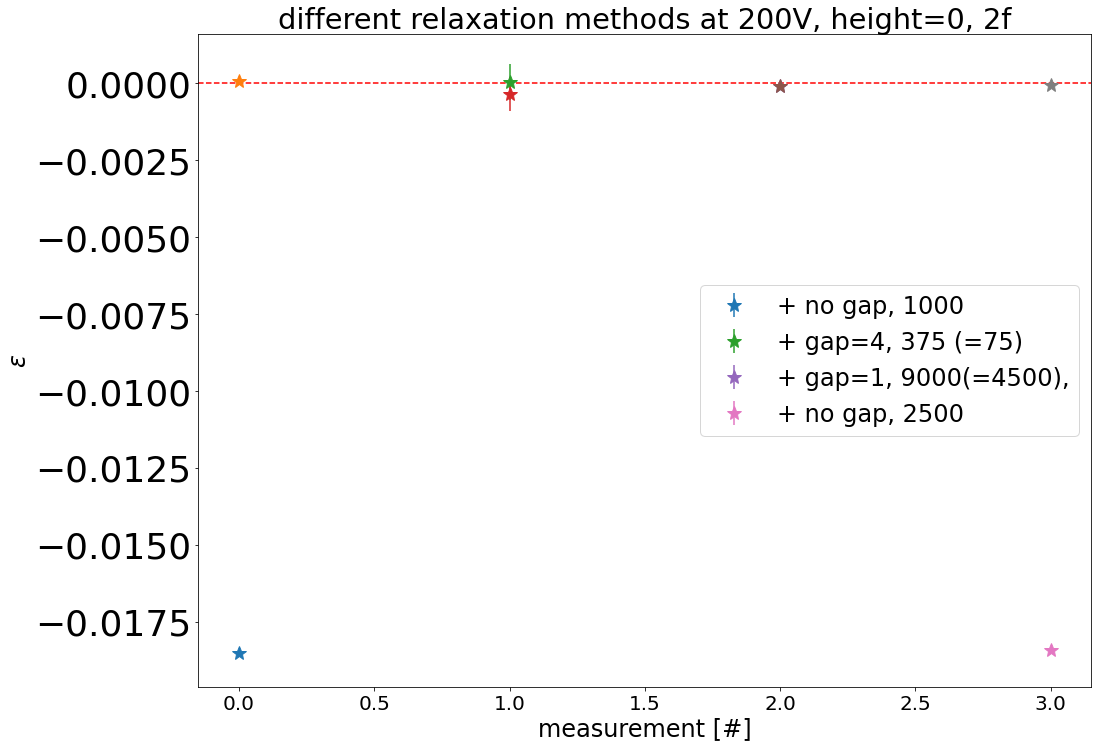

In [193]:
x=[0]
plt.errorbar(x,meanDF0[2::6],yerr=stdDF0[2::6],linestyle="",marker="*",markersize=15,label="+ no gap, 1000")
plt.errorbar(x,meanDF0[3::6],yerr=stdDF0[3::6],linestyle="",marker="*",markersize=15,)
x=[1]
plt.errorbar(x,meanDF1[2::6],yerr=stdDF1[2::6],linestyle="",marker="*",markersize=15,label="+ gap=4, 375 (=75)")
plt.errorbar(x,meanDF1[3::6],yerr=stdDF1[3::6],linestyle="",marker="*",markersize=15,)
x=[2]
plt.errorbar(x,meanDF2[2::6],yerr=stdDF2[2::6],linestyle="",marker="*",markersize=15,label="+ gap=1, 9000(=4500),")
plt.errorbar(x,meanDF2[3::6],yerr=stdDF2[3::6],linestyle="",marker="*",markersize=15)
x=[3]
plt.errorbar(x,meanDF3[2::6],yerr=stdDF3[2::6],linestyle="",marker="*",markersize=15,label="+ no gap, 2500")
plt.errorbar(x,meanDF3[3::6],yerr=stdDF3[3::6],linestyle="",marker="*",markersize=15)



plt.title("different relaxation methods at 200V, height=0, 2f")
plt.ylabel(r"$\epsilon$")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("measurement [#]")

plt.legend()

plt.show()

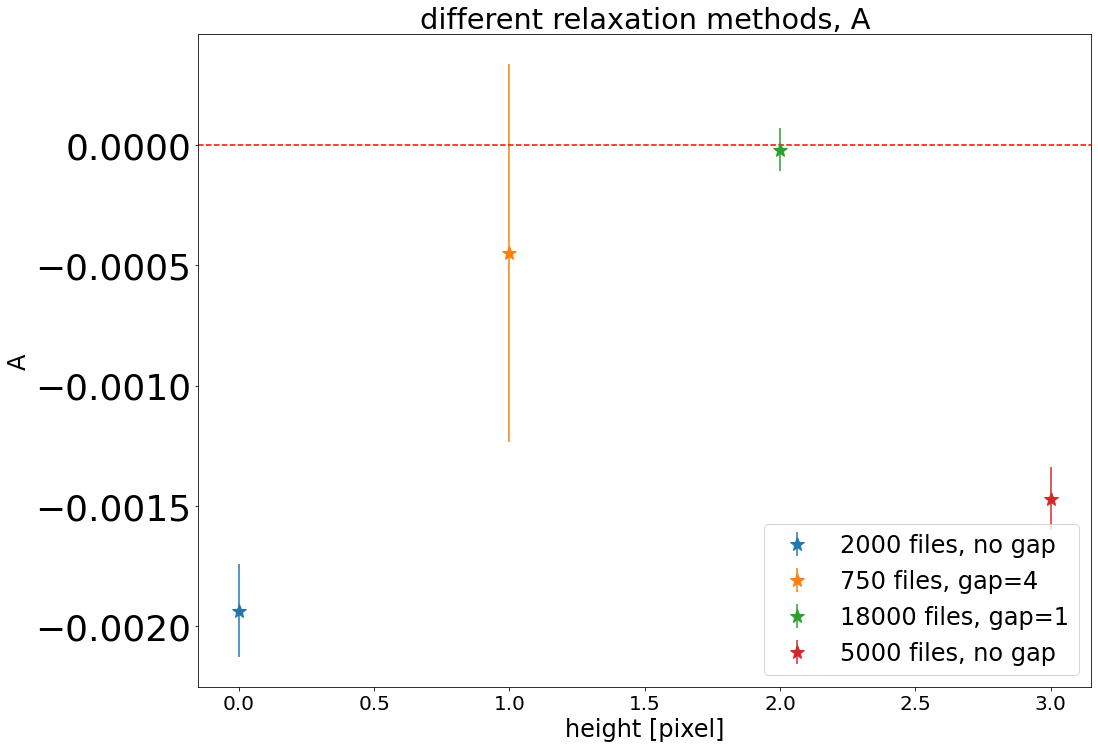

In [194]:
yerr0=  [np.sqrt(stdDF0[i]**2+0.85**2*stdDF0[i+1]**2) for i in np.arange(0,len(stdDF0),6)]
yerr1=  [np.sqrt(stdDF1[i]**2+0.85**2*stdDF1[i+1]**2) for i in np.arange(0,len(stdDF1),6)]
yerr2=  [np.sqrt(stdDF2[i]**2+0.85**2*stdDF2[i+1]**2) for i in np.arange(0,len(stdDF2),6)]
yerr3=  [np.sqrt(stdDF3[i]**2+0.85**2*stdDF3[i+1]**2) for i in np.arange(0,len(stdDF3),6)]
x=[0]
plt.errorbar(x,meanDF0[4::6],yerr=yerr0,linestyle="",marker="*",markersize=15,label="2000 files, no gap")
x=[1]
plt.errorbar(x,meanDF1[4::6],yerr=yerr1,linestyle="",marker="*",markersize=15,label="750 files, gap=4")
x=[2]
plt.errorbar(x,meanDF2[4::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="18000 files, gap=1")
x=[3]
plt.errorbar(x,meanDF3[4::6],yerr=yerr3,linestyle="",marker="*",markersize=15,label="5000 files, no gap")


plt.title("different relaxation methods, A")
plt.ylabel(r"A")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")
plt.legend()
plt.show()

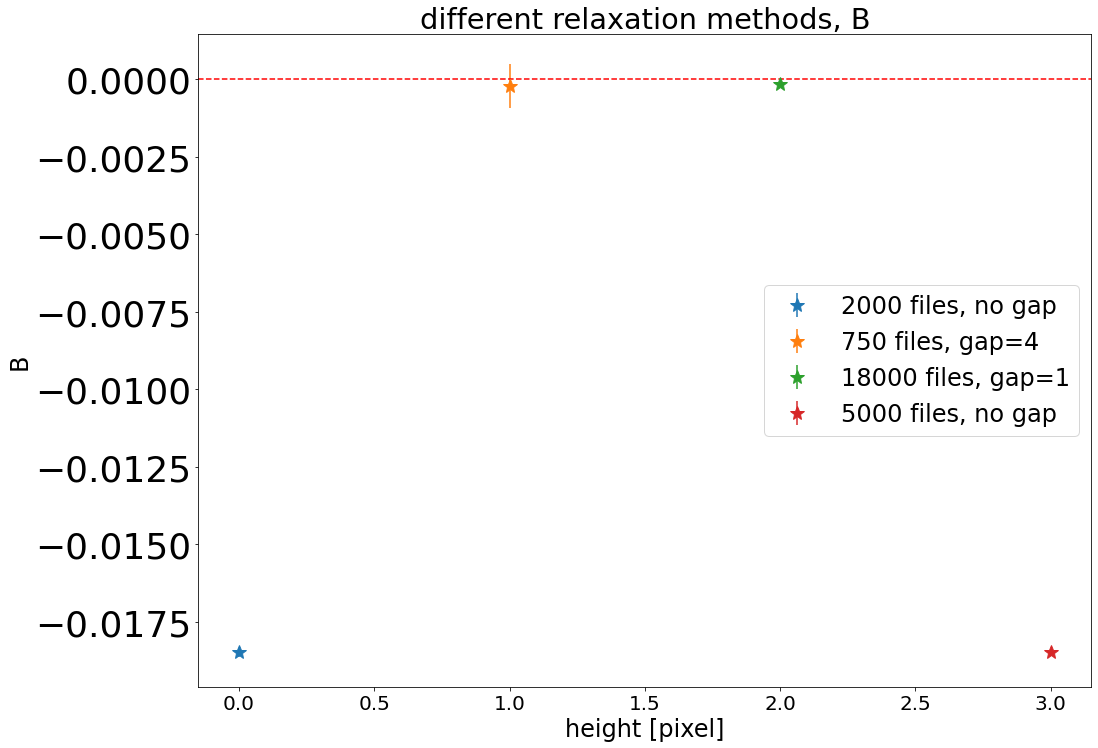

In [195]:
yerr0=  [np.sqrt(stdDF0[2]**2+0.85**4*stdDF0[3]**2)]
yerr1=  [np.sqrt(stdDF1[2]**2+0.85**4*stdDF1[3]**2)]
yerr2=  [np.sqrt(stdDF2[2]**2+0.85**4*stdDF2[3]**2)]
yerr3=  [np.sqrt(stdDF3[2]**2+0.85**4*stdDF3[3]**2)]
x=[0]
plt.errorbar(x,meanDF0[5::6],yerr=yerr0,linestyle="",marker="*",markersize=15,label="2000 files, no gap")
x=[1]
plt.errorbar(x,meanDF1[5::6],yerr=yerr1,linestyle="",marker="*",markersize=15,label="750 files, gap=4")
x=[2]
plt.errorbar(x,meanDF2[5::6],yerr=yerr2,linestyle="",marker="*",markersize=15,label="18000 files, gap=1")
x=[3]
plt.errorbar(x,meanDF3[5::6],yerr=yerr3,linestyle="",marker="*",markersize=15,label="5000 files, no gap")


plt.title("different relaxation methods, B")
plt.ylabel(r"B")
plt.axhline(0,color="red",linestyle="dashed")
plt.xlabel("height [pixel]")
plt.legend()
plt.show()

In [196]:
yerr2=  [np.sqrt(stdDF2[2]**2+0.85**2*stdDF2[3]**2)]
yerr2

[8.998149279026226e-05]

In [197]:
np.mean(df2.A_1)       
A = -1.8856382540784877e-05 +- 9.075451595578164e-05

In [198]:
np.mean(df2.B_1)
B= -1.3883501792065226e-04 +- 8.998149279026226e-05

In [199]:
df = df2
df_side =df2_side
print("Ratio \n",np.mean(df)/np.mean(df_side))
print("Mean \n", np.mean(df))
print("Std \n", np.std(df)/np.sqrt(len(df)))
print("Mean sideband \n", np.mean(df_side))
print("Mean std \n", np.std(df_side)/np.sqrt(len(df_side)))


Ratio 
 F1_1     -0.372029
F2_1      0.578759
G1_1     -1.145067
G2_1    172.743577
A_1      -0.076197
B_1      -1.968333
dtype: float64
Mean 
 F1_1   -0.000063
F2_1    0.000052
G1_1   -0.000081
G2_1   -0.000080
A_1    -0.000019
B_1    -0.000139
dtype: float64
Std 
 F1_1    0.000069
F2_1    0.000069
G1_1    0.000067
G2_1    0.000071
A_1     0.000091
B_1     0.000083
dtype: float64
Mean sideband 
 F1_1    1.704709e-04
F2_1    9.058668e-05
G1_1    7.086826e-05
G2_1   -4.622016e-07
A_1     2.474696e-04
B_1     7.053432e-05
dtype: float64
Mean std 
 F1_1    0.000102
F2_1    0.000105
G1_1    0.000061
G2_1    0.000062
A_1     0.000136
B_1     0.000076
dtype: float64


In [308]:
folder = "/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V/"
for i in range(11):
    trekConvFactor = 200
    fname = folder + 'Discharge_'+str(i)+'.h5'
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    voltage0= np.std(neutralityFile.electrode_data[0])*np.sqrt(2)*trekConvFactor
    voltage1= np.std(neutralityFile.electrode_data[1])*np.sqrt(2)*trekConvFactor
    bias = np.mean(neutralityFile.electrode_data[0])*200
    print("voltages, bias: ", voltage0, voltage1, bias)


voltages, bias:  199.9150269052005 0.005968747734094512 0.20120087234732598
voltages, bias:  0.005676179013354581 0.005986372111432005 0.20962770747273082
voltages, bias:  0.005724682880205593 0.005965077472818193 0.20917617706776842
voltages, bias:  0.005838710792993433 0.005973247605368954 0.20972333229113013
voltages, bias:  0.0056875858864684666 0.0059549418034565505 0.2117131048859246
voltages, bias:  0.005706295305817684 199.91598499131362 0.2123624943105426
voltages, bias:  0.005703649778314431 0.005967592380290588 0.21192536787088367
voltages, bias:  0.005706568874859521 0.005960330602574096 0.21188226718302713
voltages, bias:  0.005922879918159677 0.005992950690551817 0.21026073357436392
voltages, bias:  0.005685613325279256 0.0060225013632754865 0.20764512294448945
voltages, bias:  199.91497124675064 0.0059953916157952135 0.20073428783756375


In [425]:
np.mean(df)

F1_1   -0.000093
F2_1    0.000010
G1_1   -0.000097
G2_1   -0.000089
A_1    -0.000084
B_1    -0.000161
dtype: float64

In [447]:
np.std(df)/np.sqrt(len(df))

F1_1    0.000075
F2_1    0.000075
G1_1    0.000072
G2_1    0.000079
A_1     0.000100
B_1     0.000090
dtype: float64

In [446]:
A_err=np.sqrt(np.std(df.F1_1)**2+(0.85*np.std(df.F2_1))**2) 
B_err=np.sqrt(np.std(df.G1_1)**2+(0.85**2*np.std(df.G2_1))**2)
print("Uncertainty A: %f" %(A_err/np.sqrt(len(df))), "\n","Uncertainty B: %f" %(B_err/np.sqrt(len(df))))

Uncertainty A: 0.000099 
 Uncertainty B: 0.000092


In [439]:
np.mean(df2)

F1_1   -0.001292
F2_1   -0.000208
G1_1   -0.018429
G2_1   -0.000070
A_1    -0.001469
B_1    -0.018479
dtype: float64

In [444]:
np.std(df2)/np.sqrt(len(df2))

F1_1    0.000106
F2_1    0.000089
G1_1    0.000085
G2_1    0.000086
A_1     0.000130
B_1     0.000106
dtype: float64

In [ ]:
def single_electrode_milli_charge(folders,printValues=True,fileNo=2000):
    df = pd.DataFrame()
    i=0
    for folder in folders:   
        i+=1
        appliedVoltage=get_voltage(folder)
        
        F = np.array(Parallel(n_jobs=32)(delayed(get_response_at_first)(j,folder) for j in tqdm(range(fileNo))))
        G = np.array(Parallel(n_jobs=32)(delayed(get_response_at_second)(j,folder) for j in tqdm(range(fileNo))))

        data0 = F/scaleY*dischargeVoltage/appliedVoltage
        F1=data0

        data1 = G/scaleY*dischargeVoltage/appliedVoltage
        G1=data1
        
        df["F1_%d" %i] = F1
        df["G1_%d" %i] = G1        
    return df

In [457]:
folders = [r"/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_single/",]
df3 =  single_electrode_milli_charge(folders,printValues=True,fileNo=1500)




  0%|          | 0/1500 [00:00<?, ?it/s]

voltages, bias:  199.91484611951324 0.0060731799878805375 0.2001310744677155





  2%|▏         | 32/1500 [00:01<00:59, 24.72it/s]


  4%|▍         | 64/1500 [00:02<00:55, 25.69it/s]


  6%|▋         | 96/1500 [00:02<00:42, 33.31it/s]


  9%|▊         | 128/1500 [00:03<00:33, 41.51it/s]


 11%|█         | 160/1500 [00:03<00:28, 47.31it/s]


 13%|█▎        | 192/1500 [00:03<00:21, 59.49it/s]


 15%|█▍        | 224/1500 [00:04<00:22, 57.75it/s]


 17%|█▋        | 256/1500 [00:04<00:18, 68.87it/s]


 19%|█▉        | 288/1500 [00:05<00:18, 66.85it/s]


 21%|██▏       | 320/1500 [00:05<00:14, 80.26it/s]


 23%|██▎       | 352/1500 [00:05<00:12, 91.08it/s]


 26%|██▌       | 384/1500 [00:06<00:13, 81.81it/s]


 28%|██▊       | 416/1500 [00:06<00:11, 93.95it/s]


 30%|██▉       | 448/1500 [00:06<00:11, 93.47it/s]


 32%|███▏      | 480/1500 [00:07<00:11, 85.11it/s]


 34%|███▍      | 512/1500 [00:07<00:10, 95.16it/s]


 36%|███▋      | 544/1500 [00:07<00:11, 82.66it/s]


 38%|███▊      | 576/1500 [00:08<00:12, 72.67it/s]


 41%|████      | 608/1500 [00:08<00:10, 85.26i

In [460]:
np.mean(df3)

F1_1   -0.000265
G1_1   -0.000030
dtype: float64

In [462]:
np.std(df3)/np.sqrt(len(df3))

F1_1    0.000127
G1_1    0.000117
dtype: float64

In [451]:
A_err=np.sqrt(np.std(df3.F1_1)**2+(0.85*np.std(df3.F2_1))**2) 
B_err=np.sqrt(np.std(df3.G1_1)**2+(0.85**2*np.std(df3.G2_1))**2)
print("Uncertainty A: %f" %(A_err/np.sqrt(len(df3))), "\n","Uncertainty B: %f" %(B_err/np.sqrt(len(df3))))

Uncertainty A: 0.000236 
 Uncertainty B: 0.000205


In [131]:
df3.G1_1.corr(df3.G1_1)

0.9999999999999998

[]

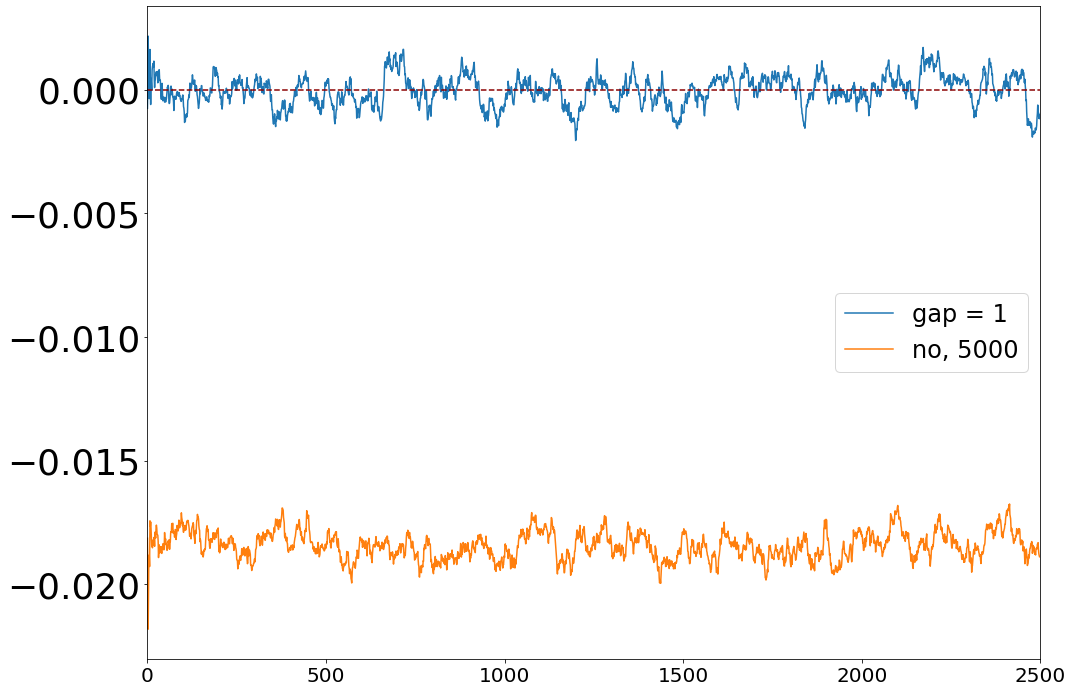

In [117]:
#plt.plot(df0.F1_1.ewm(span=50).mean(),label="no, 2000")
#plt.plot(df1.F1_1.ewm(span=50).mean(),label="gap =4 ")
plt.plot(df2.G1_1.ewm(span=50).mean(),label="gap = 1")
plt.plot(df3.G1_1.ewm(span=50).mean(),label="no, 5000")
plt.xlim(0,2500)
plt.axhline(0, linestyle="dashed",color="darkred")
plt.legend()
plt.plot()

In [349]:
folder = "/data/new_trap/20210622/bead1/Neutrality2/Relaxation_20210708/200V_2/"
voltage0=[]
voltage1=[]
for i in range(150):
    trekConvFactor = 200
    fname = folder + 'Discharge_'+str(i)+'.h5'
    neutralityFile = BeadDataFile.BeadDataFile(fname=fname)
    voltage0.append(np.std(neutralityFile.electrode_data[0])*np.sqrt(2)*trekConvFactor)
    voltage1.append(np.std(neutralityFile.electrode_data[1])*np.sqrt(2)*trekConvFactor)
    #bias = np.mean(neutralityFile.electrode_data[0])*200
    #print("voltages, bias: ", voltage0, voltage1, bias)
